# Elliptic Curves

An elliptic curve is given by an equation of the general form:  

$$ y^2 = x^3 + ax + b$$

Suppose $a=-1$ and $b=3$.  To ensure that $y$ has a real value throughout it's domain, we solve the following:  

$$ x^3  -x \ge 3 \quad\implies$$

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

/tmp/ipykernel_146657/3977778325.py:3: RuntimeWarning: invalid value encountered in sqrt
  f = np.sqrt(x**3+a*x + b)


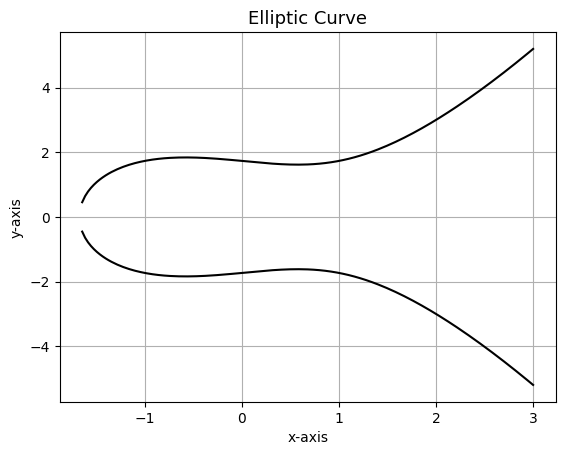

In [2]:
x = np.linspace(-3,3,num=200)
a = -1; b = 3
f = np.sqrt(x**3+a*x + b)

fig, ax = plt.subplots()
ax.set_title('Elliptic Curve', size=13)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.grid()

ax.plot(x, f, 'k')
ax.plot(x, -f, 'k')

## Parametric Form

In parametric form, a generic elliptic curve is plotted by the position vector:  

$$ \mathbf{p}:=\mathbf{p}(t) = \left\langle t, \pm \sqrt{t^3+at + b}\right\rangle$$

Now, suppose we rotate the generic elliptic curve by $\theta$.  The rotated curve is given by:  

$$ \mathbf{r}:=\mathbf{r}(t) = t\langle \cos\theta, \sin\theta\rangle + p_y\Big\langle \cos\big(0.5\pi + \theta\big), \sin\big(0.5\pi + \theta\big)\Big\rangle$$

$$ = t\langle \cos\theta,\sin\theta\rangle + p_y\langle -\sin\theta, \cos\theta\rangle$$

Thus, the rotated curve is given by the parametric equation,  

$$ x:=x(t) = t\cos\theta \pm \sqrt{t^3+at+b}\sin\theta \quad\quad \text{and}\quad\quad y:=y(t) = t\sin\theta \pm\sqrt{t^3+at + b}\cos\theta$$

/tmp/ipykernel_146657/3634534497.py:3: RuntimeWarning: invalid value encountered in sqrt
  f = np.sqrt(t**3+a*t + b)


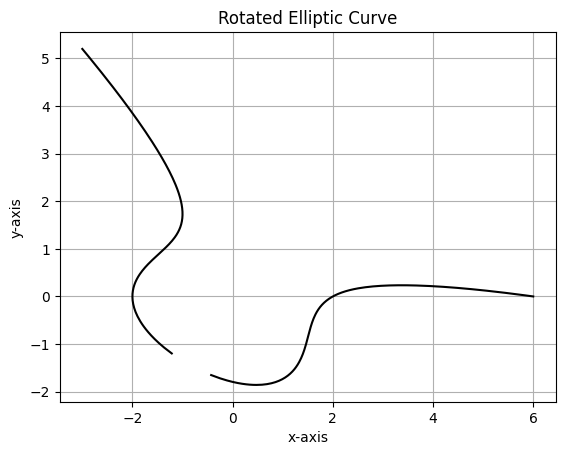

In [3]:
t = np.linspace(-3,3,num=200)
theta = np.radians(60)
f = np.sqrt(t**3+a*t + b)
x_p = t*np.cos(theta) - f*np.sin(theta)
x_n = t*np.cos(theta) + f*np.sin(theta)
y_p = t*np.sin(theta) + f*np.cos(theta)
y_n = t*np.sin(theta) - f*np.cos(theta)

fig, ax = plt.subplots()
ax.set_title('Rotated Elliptic Curve', size=12)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.grid()

ax.plot(x_p, y_p, 'k')
ax.plot(x_n, y_n, 'k')

## As Contour Lines

Suppose we have a surface in 3D space given by:  

$$ w = 12x^2 + y^3 − 12xy$$

<a list of 16 text.Text objects>

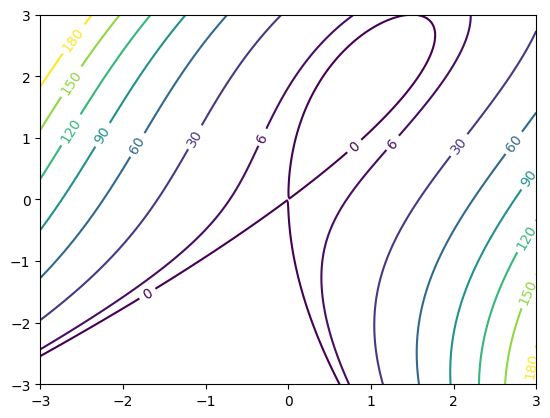

In [4]:
x = np.linspace(-3,3,num=200)
x, y = np.meshgrid(x,x)
w = 12*x**2 + y**3 - 12*x*y

fig, ax = plt.subplots()

lvls = list(range(0,210,30))
lvls.append(6)
lvls.sort()
cs = ax.contour(x,y,w,levels=lvls)
ax.clabel(cs, cs.levels)

The level curve or contour line of the surface at $w=6$ is given by:  

$$ 6 = 12x^2 + y^3 - 12xy$$

The parametric equations that gives the contour line are of the form:  

$$ x:=x(t) = a_3t^3 + a_2t^2 + a_1t + a_0 \quad\quad\text{and}\quad\quad y:=y(t)=b_2t^2 + b_1t + b_0$$

Via the above three equations,  

$$ 6 = 12\big( \big) + y^3  - 12\big( \big)$$

In [5]:
a_3, a_2, a_1, a_0 = sp.symbols('a_3, a_2, a_1, a_0')

In [6]:
b_2, b_1, b_0, t = sp.symbols('b_2, b_1, b_0, t')
y = b_2*t**2 + b_2*t + b_0
x = a_3*t**3 + a_2*t**2 + a_1*t + a_0
ex = 12*x**2 + y**3 - 12*x*y
ex

(b_0 + b_2*t**2 + b_2*t)**3 - (b_0 + b_2*t**2 + b_2*t)*(12*a_0 + 12*a_1*t + 12*a_2*t**2 + 12*a_3*t**3) + 12*(a_0 + a_1*t + a_2*t**2 + a_3*t**3)**2

In [7]:
12*sp.expand(x**2)

12*a_0**2 + 24*a_0*a_1*t + 24*a_0*a_2*t**2 + 24*a_0*a_3*t**3 + 12*a_1**2*t**2 + 24*a_1*a_2*t**3 + 24*a_1*a_3*t**4 + 12*a_2**2*t**4 + 24*a_2*a_3*t**5 + 12*a_3**2*t**6

In [8]:
sp.expand(y**3)

b_0**3 + 3*b_0**2*b_2*t**2 + 3*b_0**2*b_2*t + 3*b_0*b_2**2*t**4 + 6*b_0*b_2**2*t**3 + 3*b_0*b_2**2*t**2 + b_2**3*t**6 + 3*b_2**3*t**5 + 3*b_2**3*t**4 + b_2**3*t**3

In [9]:
-12*sp.expand(x*y)

-12*a_0*b_0 - 12*a_0*b_2*t**2 - 12*a_0*b_2*t - 12*a_1*b_0*t - 12*a_1*b_2*t**3 - 12*a_1*b_2*t**2 - 12*a_2*b_0*t**2 - 12*a_2*b_2*t**4 - 12*a_2*b_2*t**3 - 12*a_3*b_0*t**3 - 12*a_3*b_2*t**5 - 12*a_3*b_2*t**4

We now have to solve the following system of equations:  

$$ 12a_3^2 + b_2^3 = 0$$

$$ 24a_2a_3 + 3b_2^3 - 12a_3b_2 = 0$$

$$ 24a_1a_3 + 12a_2^2 + 3b_0b_2^2 + 3b_2^3 - 12a_3b_2 - 12a_2b_2 = 0$$

$$ 24a_0a_3 + 24a_1a_2 + 6b_0b_2^2 + b_2^3 - 12a_1b_2 - 12a_2b_2 - 12a_3b_0 = 0$$

$$ 24a_0a_2 + 12a_1^2 + 3b_0^2b_2 + 3b_0b_2^2 - 12a_0b_2 - 12a_1b_2 - 12a_2b_0 = 0$$

In [10]:
x, y, w = sp.symbols('x y w')
sp.solve(12*x**2 + y**3 - 12*x*y - w, x)

[y/2 - sqrt(3*w - 3*y**3 + 9*y**2)/6, y/2 + sqrt(3*w - 3*y**3 + 9*y**2)/6]

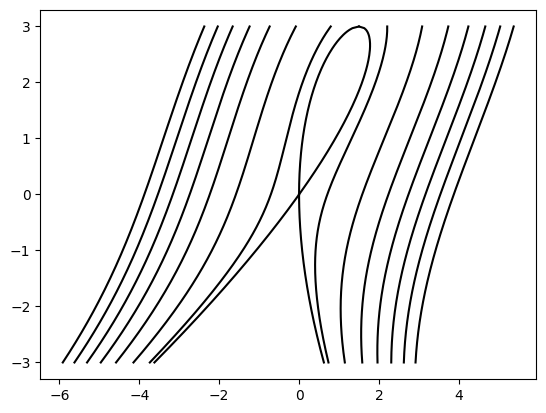

In [11]:
y = np.linspace(-3,3,num=200)
w = 6
x1 = y/2 - np.sqrt(-3*y**3 + 9*y**2 + 3*w)/6
x2 = y/2 + np.sqrt(-3*y**3 + 9*y**2 + 3*w)/6

fig, ax = plt.subplots()


ax.plot(x1, y, 'k')
ax.plot(x2, y, 'k')
for w in range(0,210,30):
    x1 = y/2 - np.sqrt(-3*y**3 + 9*y**2 + 3*w)/6
    x2 = y/2 + np.sqrt(-3*y**3 + 9*y**2 + 3*w)/6
    ax.plot(x1, y, 'k')
    ax.plot(x2, y, 'k')